In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis(EDA)

In [8]:
df=pd.read_csv("/content/drive/MyDrive/DS_dataset.csv")
df.head(10)

,Customer_ID,Var1,Var2,Group,Category,Rating,Purchased_ABC_product
0,5518,41.534,12.123,G1,C1,Bronze,0
1,40515,9.445,0.256,G1,C1,Bronze,0
2,52697,37.599,3.199,G1,C2,Gold,0
3,68202,81.514,1.645,G1,C1,Silver,0
4,130003,46.805,1.706,G1,C1,Silver,0
5,175229,19.222,2.133,G1,C3,Silver,0
6,175295,41.091,2.536,G1,C4,Silver,1
7,181524,96.706,9.295,G1,C1,Gold,1
8,183955,82.989,5.431,G1,C2,Gold,1
9,232643,2.009,1.084,G1,C1,Silver,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30829 entries, 0 to 30828
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            30829 non-null  int64  
 1   Var1                   30829 non-null  float64
 2   Var2                   30829 non-null  float64
 3   Group                  30829 non-null  object 
 4   Category               30829 non-null  object 
 5   Rating                 30829 non-null  object 
 6   Purchased_ABC_product  30829 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.6+ MB


In [10]:
# Customer_ID is not a important variable for training so we can drop it
df=df.drop('Customer_ID', axis=1)

In [11]:
df.describe().round(2)

,Var1,Var2,Purchased_ABC_product
count,30829.00,30829.00,30829.0
mean,64.87,4.99,0.5
std,114.37,9.53,0.5
min,0.25,0.00,0.0
25%,13.26,0.67,0.0
50%,31.86,2.19,1.0
75%,68.70,5.48,1.0
max,2909.78,317.38,1.0


In [12]:
# no null values
df.isnull().sum()

Var1                     0
Var2                     0
Group                    0
Category                 0
Rating                   0
Purchased_ABC_product    0
dtype: int64

Processing Categorical Features/variables

In [13]:
# seperating categorical data
object_type=["Group","Category","Rating"]
cat = df[object_type]
cat

,Group,Category,Rating
0,G1,C1,Bronze
1,G1,C1,Bronze
2,G1,C2,Gold
3,G1,C1,Silver
4,G1,C1,Silver
...,...,...,...
30824,G5,C3,Bronze
30825,G5,C1,Bronze
30826,G5,C1,Bronze
30827,G5,C3,Bronze


In [14]:
# Replacing the categorical variable with actual values

cat['Rating'] = cat['Rating'].replace({'Bronze':1,'Silver':2, 'Gold':3})
cat.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Group,Category,Rating
0,G1,C1,1
1,G1,C1,1
2,G1,C2,3
3,G1,C1,2
4,G1,C1,2
5,G1,C3,2
6,G1,C4,2
7,G1,C1,3
8,G1,C2,3
9,G1,C1,2


In [15]:
# Creating Dummy variables
cat=pd.get_dummies(cat,drop_first=True)
cat.head(10)

,Rating,Group_G2,Group_G3,Group_G4,Group_G5,Group_G6,Group_G7,Group_G8,Category_C2,Category_C3,Category_C4,Category_C5
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,1,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,1,0,0
6,2,0,0,0,0,0,0,0,0,0,1,0
7,3,0,0,0,0,0,0,0,0,0,0,0
8,3,0,0,0,0,0,0,0,1,0,0,0
9,2,0,0,0,0,0,0,0,0,0,0,0


In [16]:
num_type=["Var1","Var2","Purchased_ABC_product"]
num = df[num_type]
num

,Var1,Var2,Purchased_ABC_product
0,41.534,12.123,0
1,9.445,0.256,0
2,37.599,3.199,0
3,81.514,1.645,0
4,46.805,1.706,0
...,...,...,...
30824,12.094,0.899,1
30825,43.214,6.484,1
30826,20.902,6.159,1
30827,11.443,0.000,0


In [17]:
# concatinatind seperated data
data=pd.concat([num, cat],axis=1)
data.head(10)

,Var1,Var2,Purchased_ABC_product,Rating,Group_G2,Group_G3,Group_G4,Group_G5,Group_G6,Group_G7,Group_G8,Category_C2,Category_C3,Category_C4,Category_C5
0,41.534,12.123,0,1,0,0,0,0,0,0,0,0,0,0,0
1,9.445,0.256,0,1,0,0,0,0,0,0,0,0,0,0,0
2,37.599,3.199,0,3,0,0,0,0,0,0,0,1,0,0,0
3,81.514,1.645,0,2,0,0,0,0,0,0,0,0,0,0,0
4,46.805,1.706,0,2,0,0,0,0,0,0,0,0,0,0,0
5,19.222,2.133,0,2,0,0,0,0,0,0,0,0,1,0,0
6,41.091,2.536,1,2,0,0,0,0,0,0,0,0,0,1,0
7,96.706,9.295,1,3,0,0,0,0,0,0,0,0,0,0,0
8,82.989,5.431,1,3,0,0,0,0,0,0,0,1,0,0,0
9,2.009,1.084,1,2,0,0,0,0,0,0,0,0,0,0,0


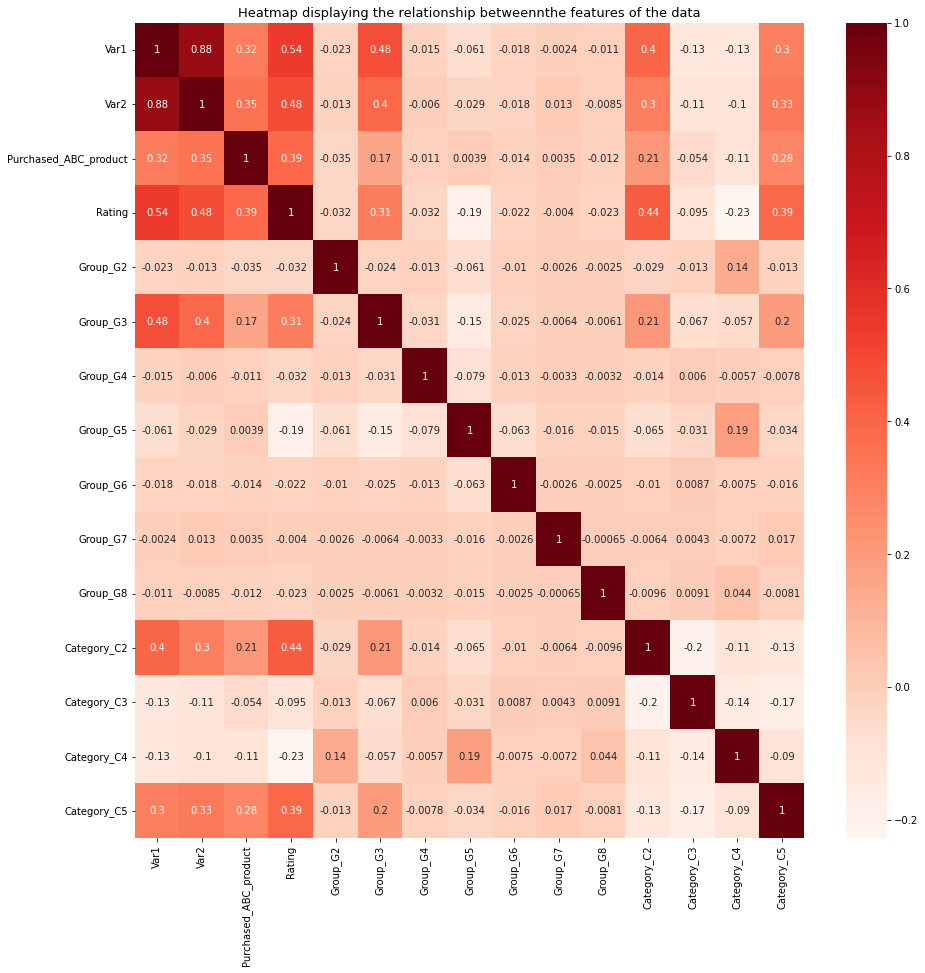

In [43]:
# Correlation – By Heatmap the relationship between the features.
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()

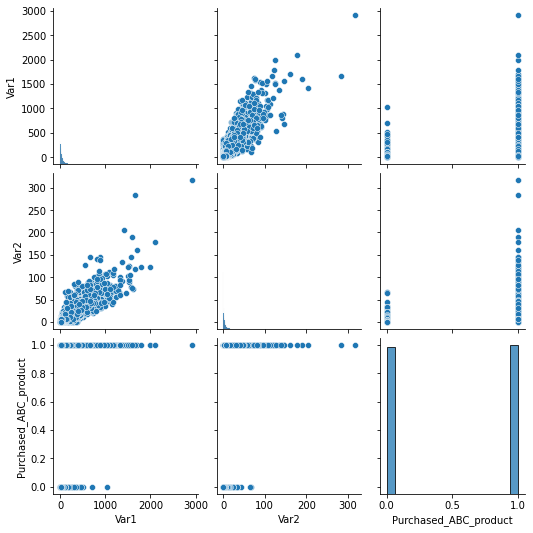

In [44]:
sns.pairplot(num)

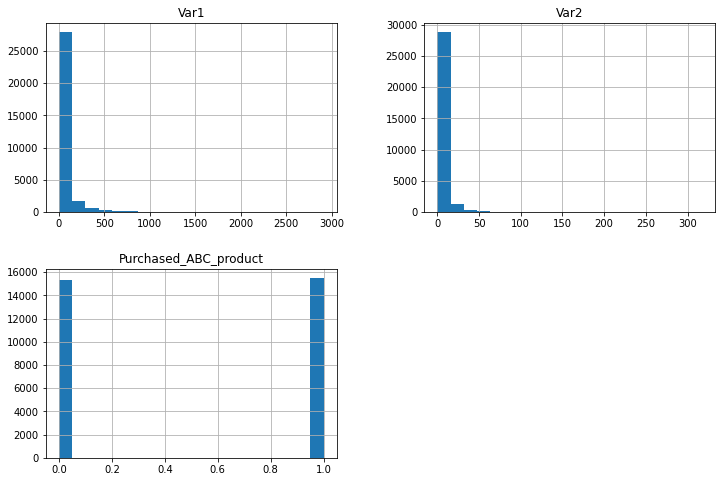

In [45]:
# Distributions of the variables/features.

num.hist(figsize=(12,8),bins=20)
plt.show()

In [21]:
data["Purchased_ABC_product"].value_counts()

1    15524
0    15305
Name: Purchased_ABC_product, dtype: int64

### Train_Test_spilt

In [22]:
x=data.drop('Purchased_ABC_product', axis=1)
x.head(10)

,Var1,Var2,Rating,Group_G2,Group_G3,Group_G4,Group_G5,Group_G6,Group_G7,Group_G8,Category_C2,Category_C3,Category_C4,Category_C5
0,41.534,12.123,1,0,0,0,0,0,0,0,0,0,0,0
1,9.445,0.256,1,0,0,0,0,0,0,0,0,0,0,0
2,37.599,3.199,3,0,0,0,0,0,0,0,1,0,0,0
3,81.514,1.645,2,0,0,0,0,0,0,0,0,0,0,0
4,46.805,1.706,2,0,0,0,0,0,0,0,0,0,0,0
5,19.222,2.133,2,0,0,0,0,0,0,0,0,1,0,0
6,41.091,2.536,2,0,0,0,0,0,0,0,0,0,1,0
7,96.706,9.295,3,0,0,0,0,0,0,0,0,0,0,0
8,82.989,5.431,3,0,0,0,0,0,0,0,1,0,0,0
9,2.009,1.084,2,0,0,0,0,0,0,0,0,0,0,0


In [23]:
y=data['Purchased_ABC_product']
y

0        0
1        0
2        0
3        0
4        0
        ..
30824    1
30825    1
30826    1
30827    0
30828    0
Name: Purchased_ABC_product, Length: 30829, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
x_train.shape

(24663, 14)

In [26]:
y_test.shape

(6166,)

## Testing all models and select better performing model

In [27]:
#importing libraries for model building

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [28]:
#considering the algorithmns in one list
classifiers = [LogisticRegression(), GaussianNB(), KNeighborsClassifier(), SVC(), DecisionTreeClassifier() , RandomForestClassifier(n_estimators=100), AdaBoostClassifier(),XGBClassifier(n_estimators=100)]

In [29]:
#fitting and testing the different models
train_model = []

for classes in classifiers:
    classes.fit(x_train, y_train)
    train_score = classes.score(x_train, y_train)
    test_score = classes.score(x_test, y_test)
    train_model.append([classes, train_score, test_score])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [30]:
train_model

[[LogisticRegression(), 0.7427725743015854, 0.7536490431397989],
 [GaussianNB(), 0.6745732473746098, 0.6850470321115796],
 [KNeighborsClassifier(), 0.8181080971495763, 0.7353227375932533],
 [SVC(), 0.7385151846896161, 0.7494323710671424],
 [DecisionTreeClassifier(), 0.999959453432267, 0.7019137204022057],
 [RandomForestClassifier(), 0.9999189068645339, 0.7418099253973403],
 [AdaBoostClassifier(), 0.76296476503264, 0.770515731430425],
 [XGBClassifier(), 0.7700198678181892, 0.7774894583198183]]

In [31]:
# Feature selection 
from sklearn.ensemble import ExtraTreesClassifier
ETR=ExtraTreesClassifier()
ETR.fit(x,y)

ExtraTreesClassifier()

In [32]:
print(ETR.feature_importances_)

[3.35031635e-01 4.84798775e-01 7.92011217e-02 8.05766852e-04
 7.27602289e-03 9.16944415e-04 4.74970301e-03 7.43629396e-04
 1.60304803e-04 1.03871973e-04 2.87550934e-02 3.90930139e-03
 3.41937562e-03 5.01284542e-02]


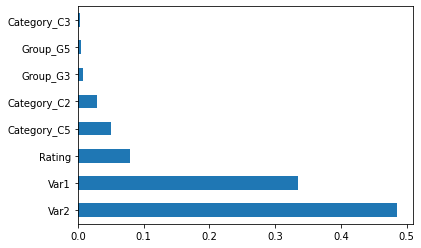

In [33]:
feat_importances=pd.Series(ETR.feature_importances_,index=x.columns)
feat_importances.nlargest(8).plot(kind="barh")

### So we can see that Var1,Var2 and Rating are most important features contributing to purchasing product and we can see the least important features we can ignore them if we want.

## Parameter Tuning Logistic Regression

In [34]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

In [35]:
grid_result.best_score_

0.7459754300489495

In [36]:
y_pred_train=grid_result.predict(x_train)
y_pred=grid_result.predict(x_test)

In [37]:
# Train score
accuracy_score(y_train,y_pred_train)

0.7462595791266269

In [38]:
# Test score
accuracy_score(y_test,y_pred)

0.7542977619202076

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78      3102
           1       0.81      0.67      0.73      3064

    accuracy                           0.75      6166
   macro avg       0.76      0.75      0.75      6166
weighted avg       0.76      0.75      0.75      6166



In [40]:
print(confusion_matrix(y_test,y_pred))

[[2613  489]
 [1026 2038]]


## Hyparameter tuning XGBoost Classifier

In [46]:
# no of trees in RF
n_estimators=list(np.linspace(start=100,stop=1000,num=10,dtype="int"))

#various learning rate parameters
learning_rate=['0.01','0.1','0.5','1']

# Regularization
alpha = ['0','0.1']

# max no of levels of tree
max_depth=np.arange(3,10,2,dtype="int")

#subsample parameter values( Subsample ratio of the training instance.)
subsample =[0.6,0.8,1]

#minimum child weight parameters(Minimum sum of instance weight(hessian) needed in a child)
min_child_weight=[3,4,5]

In [47]:
# creating param grid
param_grid= {"n_estimators":n_estimators,
            "learning_rate":learning_rate,
             "alpha":alpha,
             "max_depth":max_depth,
             "subsample":subsample,
             "min_child_weight":min_child_weight}

print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'learning_rate': ['0.01', '0.1', '0.5', '1'], 'alpha': ['0', '0.1'], 'max_depth': array([3, 5, 7, 9]), 'subsample': [0.6, 0.8, 1], 'min_child_weight': [3, 4, 5]}


In [48]:
xgbc=XGBClassifier()

xgb=GridSearchCV(xgbc,param_grid=param_grid,scoring='accuracy', n_jobs=-1, cv=5, verbose=3)

In [49]:
xgb.fit(x_train,y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


KeyboardInterrupt: ignored

In [ ]:
xgb.best_score_

In [ ]:
y_pred_train=xgb.predict(x_train)
y_pred=xgb.predict(x_test)

In [ ]:
# Train score
accuracy_score(y_train,y_pred_train)

In [ ]:
# Test score
accuracy_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
print(confusion_matrix(y_test,y_pred))